# Big Data Algorithms
## List 1

In [1]:
import numpy as np
from numpy.random import choice
from matplotlib import pyplot as plt

### Task 1
Simulate 20 rollings of a biased dice (i.e., the face with 6 dots is twice more probable
than other outcomes).

In [2]:
probabilities = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]
dice_rolls = [1, 2, 3, 4, 5, 6]
colors = ['maroon', 'green', 'blue']

In [3]:
choice(dice_rolls, size=20, replace=True, p=probabilities)

array([3, 6, 5, 1, 6, 2, 3, 5, 5, 4, 1, 5, 6, 6, 3, 4, 6, 5, 4, 5])

We can do better

In [4]:
trials = [20, 500, 10000]

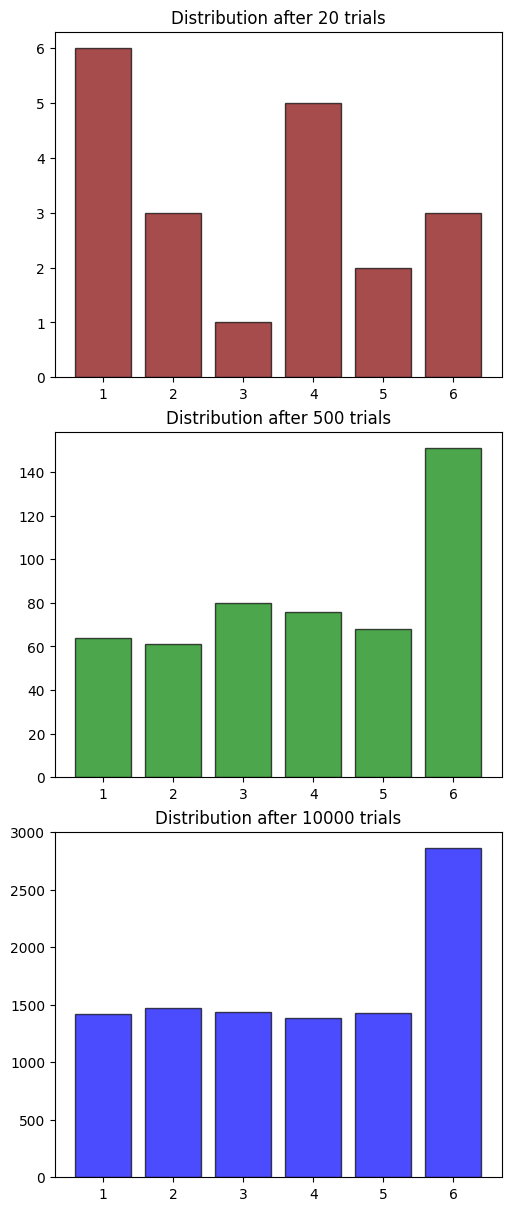

In [5]:
figure, axes = plt.subplots(len(trials), 1, layout='constrained', figsize=(5, 12))

for index, trial in enumerate(trials):
    simulation = choice(dice_rolls, size=trial, replace=True, p=probabilities)
    axes[index].hist(simulation, range=(0.5, 6.5), bins=6, color=colors[index],
                     align='mid', alpha=0.7, ec='black', rwidth=0.8)
    title = f'Distribution after {trial} trials'
    axes[index].set(title=title, xticks=dice_rolls)

### Task 2
Choose 10 numbers from the set {5, 6, . . . , 100} without replacement.

In [6]:
samples = 10
number_set = range(5, 101)
choices = choice(number_set,
                 size=samples,
                 replace=False)
print(f'From {number_set}\n'
      f'chosen numbers are: {choices}')

From range(5, 101)
chosen numbers are: [100  15  37  70  94  56  53  21  91  52]


### Task 3
Generate 2000 Bernoulli trails with success probability equal p = 0.5 (fair coin tosses).
Compare the number of successes with the expected value.

In [7]:
from numpy.random import binomial

In [8]:
probability = 0.5
binomial(n=1, p=probability, size=20)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [9]:
probabilities = [0.25, 0.5, 0.75]
samples = 2000

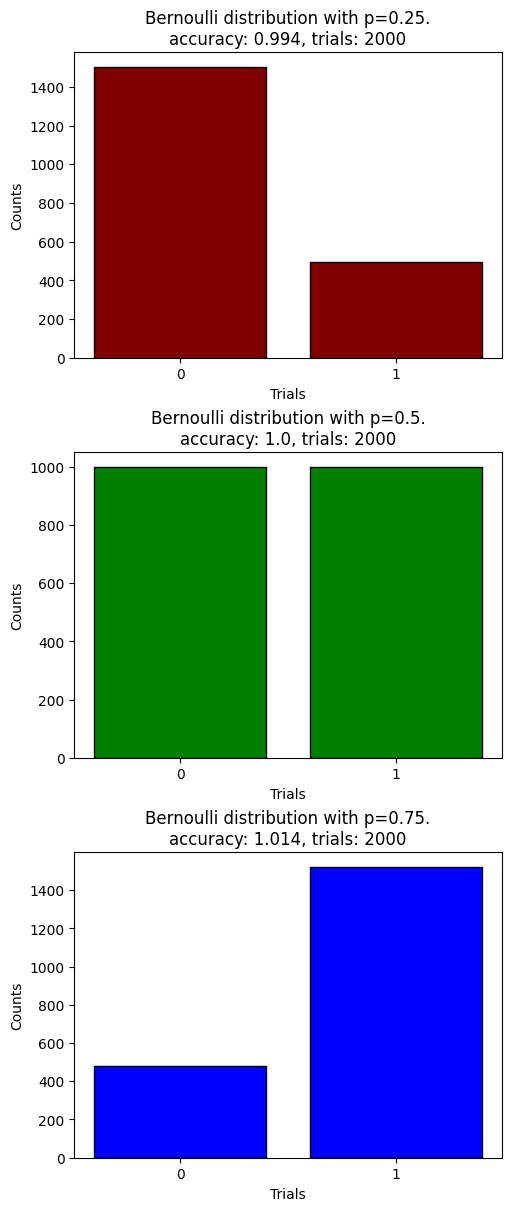

In [10]:
figure2, axes2 = plt.subplots(len(probabilities), 1, layout='constrained', figsize=(5, 12))
for index, probability in enumerate(probabilities):
    choices = binomial(n=1, p=probability, size=samples)
    counts = np.bincount(choices)
    accuracy = (counts[1] / sum(counts)) / probability
    axes2[index].hist(choices, bins=2, range=(-0.5, 1.5),
                      rwidth=0.8, color=colors[index], ec='black')
    axes2[index].set(xticks=[0, 1], xlabel='Trials', ylabel='Counts')
    axes2[index].set_title(f'Bernoulli distribution with p={probability}.\n'
                           f'accuracy: {accuracy}, trials: {samples}')

### Task 4
Generate $10^i$ 
samples from a normal distribution with parameters µ = 0 and σ = 1.
Draw histogram for each i ∈ {0, . . . , 8}.

In [11]:
from numpy.random import normal

In [12]:
mean, variance = 0, 1
colors_task4 = ['maroon', 'orange', 'chocolate', 'gold', 'greenyellow',
                'forestgreen', 'aqua', 'mediumblue', 'indigo']

Text(0.5, 0.98, 'Generated normal distributions for $\\mu$ = 0 and $\\sigma$ = 1.')

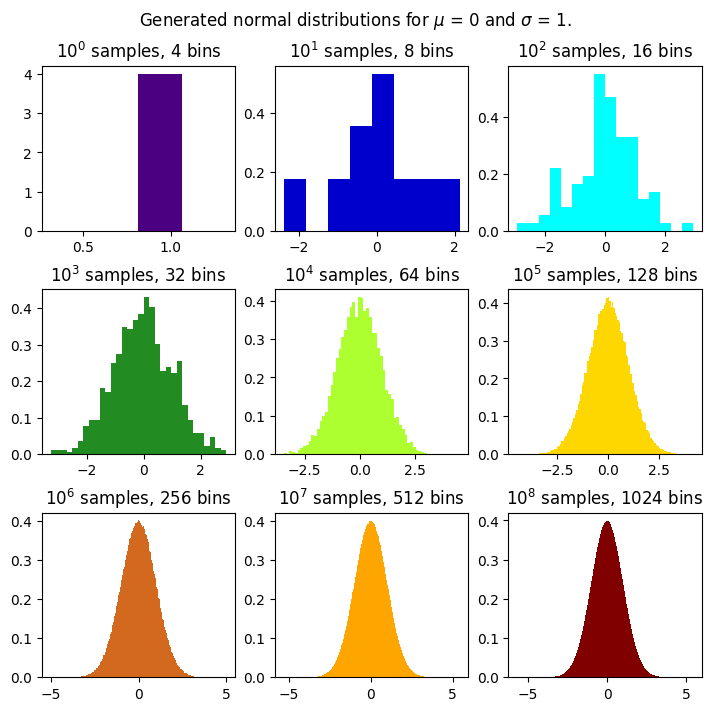

In [18]:
figure, axes = plt.subplots(3, 3, layout='constrained', figsize=(7, 7))

for i, axes in enumerate(figure.axes):
    bins = 2 ** (i + 2)
    trials = 10 ** i
    samples = normal(loc=mean, scale=variance, size=trials)
    axes.hist(samples, bins=bins, color=colors_task4[-(i+1)], density=True)
    axes.set_title(f'$10^{i}$ samples, {bins} bins')
figure.suptitle(f'Generated normal distributions for $\mu$ = {mean} and $\sigma$ = {variance}.')

### Task 5
Generate 2000 Bernoulli trails with success probability equal p = 0.15.

In [22]:
trials = 2000
p = 0.15
X = binomial(n=1, p=p, size=trials)

print(f'Bernoulli samples: {trials}')
print(f'Probability of success: {p}')

Bernoulli samples: 2000
Probability of success: 0.15


<ul><li>Find the number of successes.</li></ul>

In [23]:
successes = np.sum(X)
ratio = successes / trials

print(f'Number of successes: {successes}')
print(f'Statistical probability: {ratio}')

Number of successes: 293
Statistical probability: 0.1465


<ul><li> Find the maximal number of consecutive successes (i.e., sequences "1"in a row)</li></ul>

In [21]:
def find_longest_streak(array):
    longest_streak = 1
    current_streak = 1
    for index, number in enumerate(array):
        try:
            if array[index + 1] == number + 1:
                current_streak += 1
            else:
                current_streak = 1
            if current_streak > longest_streak:
                longest_streak = current_streak
        except IndexError:
            pass
    return longest_streak

In [27]:
success_index = np.where(X == 1)[0]
streak = find_longest_streak(success_index)

print(f'Longest success streak: {streak}')
print(f'Successes index list:\n{success_index[1:21]} ...')

Longest success streak: 3
Successes index list:
[ 22  28  29  31  32  36  41  43  56  57  65  69  74  75  81 103 110 114
 119 124] ...


<ul><li>Find the probability of getting less than 250 or more than 350 successes.</li></ul>

In [28]:
from scipy.stats import binom

In [30]:
less_than = 250
more_than = 350

p_less_than_250 = binom.cdf(less_than, trials, p)
p_more_than_350 = binom.sf(more_than, trials, p)
total_probability = p_less_than_250 + p_more_than_350

print(f'Probability of less than {less_than} successes: {p_less_than_250}')
print(f'Probability of more than {more_than} successes: {p_more_than_350}')
print(f'Total probability: {total_probability}')

Probability of less than 250 successes: 0.0007671115930515822
Probability of more than 350 successes: 0.0009628199784390611
Total probability: 0.0017299315714906433


<ul><li>Approximate the minimal p such that we will get at least 30 consecutive with
high probability.</li></ul>

In [31]:
probabilities = np.linspace(0.15, 0.85, 200)
consecutive_streak = 30

In [33]:
average_trials = 50
threshold_p = 0
for probability in probabilities:
    avg_sum = 0
    for i in range(average_trials):
        event = binomial(n=1, p=probability, size=trials)
        success_index = np.where(event == 1)[0]
        streak = find_longest_streak(success_index)
        avg_sum += streak
    avg = avg_sum / average_trials
    if avg > consecutive_streak:
        threshold_p = probability
        break
print(f'Estimated probability for {consecutive_streak} consecutive streak is {threshold_p}')

Estimated probability for 30 consecutive streak is 0.8113065326633165


### Task 6
We toss a coin 1000 times. Let X be the number of heads. Find the probability that X
is a number divisible by 11